## Preprocessing & Data Health Check
This file acts as a **data validation and sanity-check pipeline** before model training.
### It covers:
- **Data Loading** – Verifies that all Excel files are accessible and readable
- **Distribution Check** – Ensures property prices fall within realistic ranges
- **Geospatial Check** – Validates latitude–longitude values and location consistency
- **Visual Check** – Confirms satellite images load correctly and match the dataset

In [2]:
'''
  All imports, modules, libs stay here,
'''
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image  # Used for opening image files

# Defining file paths
IMAGE_DIR = "data/images"
TRAIN_PATH = "data/train(1).xlsx"
TEST_PATH = "data/test2.xlsx"

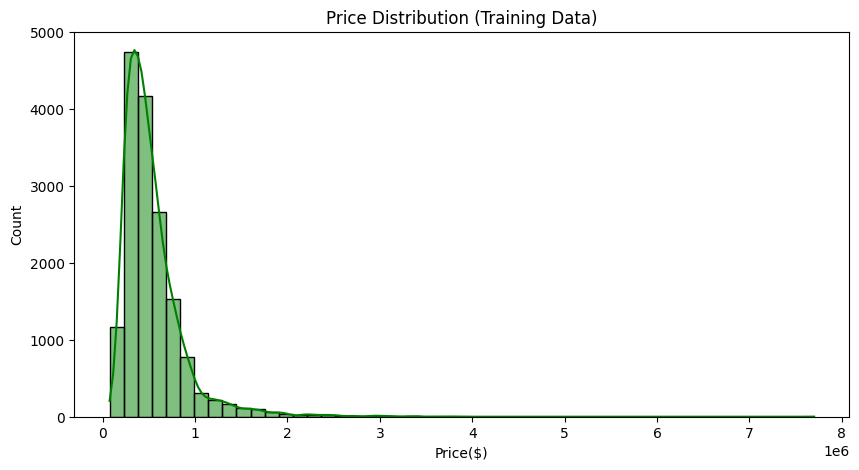

Avg Price: $537,470.28
Max Price: $7,700,000.00


In [4]:
'''
import pandas as pd
'''

# Loading Training and Test data sets.
train_df = pd.read_excel(TRAIN_PATH)
test_df = pd.read_excel(TEST_PATH)

# 2_Visualizing Price Distributions.
plt.figure(figsize=(10, 5))
sns.histplot(train_df['price'], bins=50, kde=True, color='green')
plt.title("Price Distribution (Training Data)")
plt.xlabel("Price($)")
plt.show()

# 3_Quick Stats
print(f"Avg Price: ${train_df['price'].mean():,.2f}")
print(f"Max Price: ${train_df['price'].max():,.2f}")

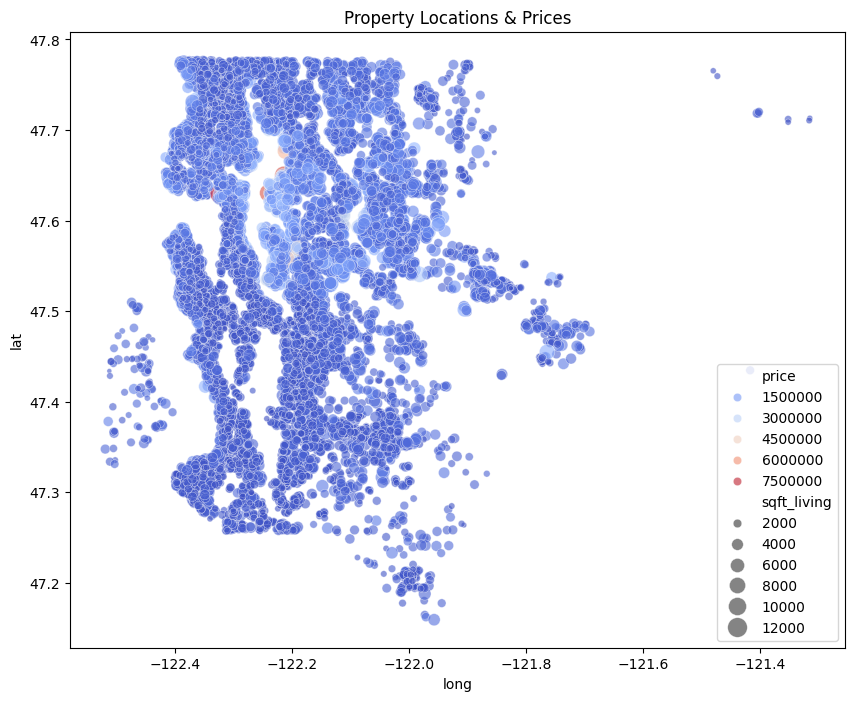

Here are 5 sample images


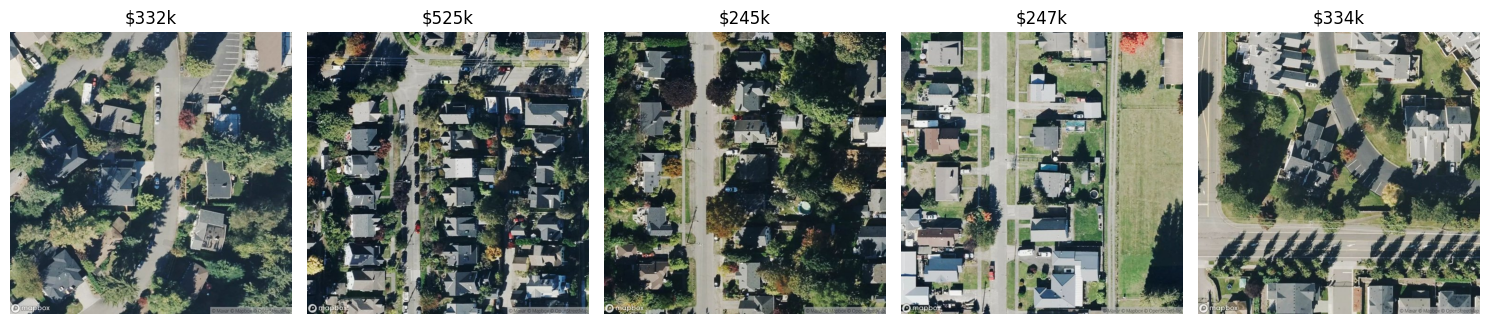

In [7]:
# GEOSPATIAL & VISUAL CHECK
'''
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
'''

# 1_Geospatial Map (Location vs Price)
# Visualizes neighborhood density and high-value areas
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=train_df, x='long', y='lat', 
    hue='price', palette='coolwarm', 
    size='sqft_living', sizes=(10, 200), alpha=0.6
)
plt.title("Property Locations & Prices")
plt.legend()
plt.show()

# 2_Visual Data Check (Satellite Images)
# Picks 5 random houses to prove images exist and match the data
print("Here are 5 sample images")
sample_houses = train_df.sample(5) 

plt.figure(figsize=(15, 5))
for i, (idx, row) in enumerate(sample_houses.iterrows()):
    # Construct file path
    img_name = f"{row['id']}.jpg"
    img_path = os.path.join(IMAGE_DIR, img_name)
    
    plt.subplot(1, 5, i+1)
    try:
        # Open and display
        if os.path.exists(img_path):
            img = Image.open(img_path)
            plt.imshow(img)
            plt.title(f"${row['price']/1000:.0f}k")
        else:
            # Placeholder for missing files
            plt.text(0.5, 0.5, "MISSING", ha='center', color='red')
            plt.title("Not Found")
    except Exception as e:
        plt.text(0.5, 0.5, "Error", ha='center', color='red')
        
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
# DATA CLEANING & EXPORT

# 1_Defining the Numerical Columns (17 Features)
# similar to what was mentioned in dataset.py
feature_cols = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade", "sqft_above",
    "sqft_basement", "yr_built", "yr_renovated", "sqft_living15",
    "sqft_lot15", "lat", "long"
]

# 2_Fill Missing Values (The "Cleaning" Part)
# We fill NaNs with 0 to prevent our model from crashing later.
train_df[feature_cols] = train_df[feature_cols].fillna(0)
test_df[feature_cols] = test_df[feature_cols].fillna(0)

# 3_Saving the Cleaned Data.
# We save these new files so 'model_training.ipynb' can load them directly.
clean_train_path = "data/train_cleaned.csv"
clean_test_path = "data/test_cleaned.csv"

train_df.to_csv(clean_train_path, index=False)
test_df.to_csv(clean_test_path, index=False)

print(f"Cleaned data saved to:")
print(f"   - {clean_train_path}")
print(f"   - {clean_test_path}")
print("Done Saving!")

Cleaned data saved to:
   - data/train_cleaned.csv
   - data/test_cleaned.csv
Done Saving!
